<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-08-20 08:55:14--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  70.5MB/s    in 2.9s    

2025-08-20 08:55:17 (70.5 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 184.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 187.0 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 135.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 145.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 152.5 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


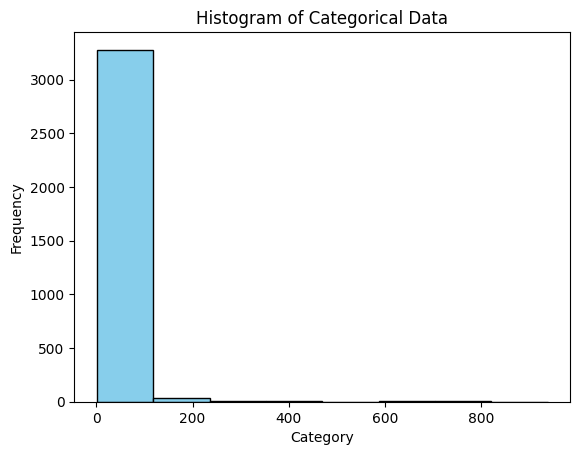

In [74]:
## Write your code here

QUERY = """
SELECT *
FROM main 
"""
df = pd.read_sql_query(QUERY, conn)

# Count the occurrences of each category
category_counts = df['CompTotal'].value_counts()

# Plot the histogram (bar chart for categorical data)
category_counts.plot(kind='hist', bins=8, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of Categorical Data')
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


<Figure size 800x500 with 0 Axes>

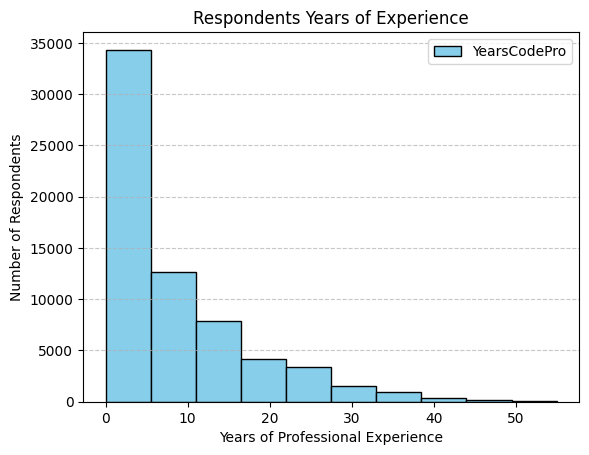

In [69]:
## Write your code here

import numpy as np

#df['YearsCodePro'] = df['YearsCodePro'].fillna(df['YearsCodePro'].mode()[0])
#df['YearsCodePro'].value_counts()

df['YearsCodePro'] = df['YearsCodePro'].replace("Less than 1 year",0)
df['YearsCodePro'] = df['YearsCodePro'].replace("More than 50 years",55)

df['YearsCodePro'] = df['YearsCodePro'].astype(int)

# Define experience ranges
bins = [0, 5, 10, 20, 30, 40, 50, float('inf')] 
labels = ['0-5', '5-10', '10-20','20-30', '30-40', '40-50', '>50']  
df['Experience_Range'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

exp_df = df[['YearsCodePro', 'Experience_Range']]

# Plot histogram
plt.figure(figsize=(8, 5))
exp_df.plot(kind='hist', color='skyblue', edgecolor='black')
plt.xlabel('Years of Professional Experience')
plt.ylabel('Number of Respondents')
plt.title('Respondents Years of Experience')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


/tmp/ipykernel_300/2112204438.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AgeMapped'] = df['Age'].map(mapping_age_group)


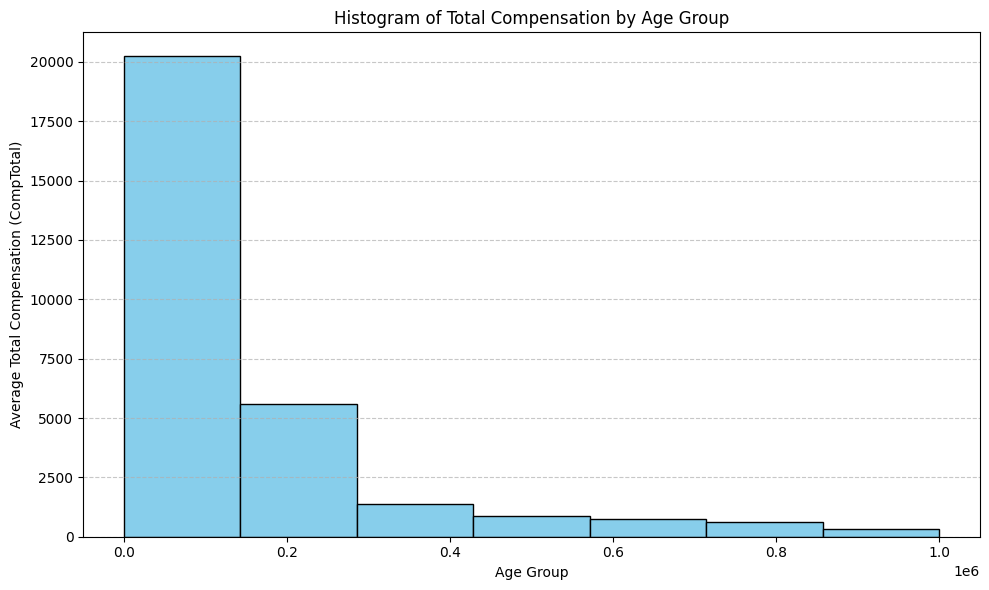

In [75]:
## Write your code here
# Ensure that CompTotal is numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Drop rows where 'CompTotal' or 'Age' is NaN
df.dropna(subset=['CompTotal', 'Age'], inplace=True)

# Remove unrealistic values (e.g., above $1 million)
df = df[df['CompTotal'] < 1_000_000]

# Map the Age column to midpoints of age ranges
mapping_age_group = {
    "Under 18 years old": 18,
    "18-24 years old": (18+24)/2,
    "25-34 years old": (25+34)/2,
    "35-44 years old": (35+44)/2,
    "45-54 years old": (45+54)/2,
    "55-64 years old": (55+64)/2,
    "65 years or older": 65
}

# Map the 'Age' column to the midpoints of each group
df['AgeMapped'] = df['Age'].map(mapping_age_group)

# Define the age groups
age_groups = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']

# Calculate the average 'CompTotal' for each age group
age_group_avg_compensation = df.groupby('AgeMapped')['CompTotal'].mean()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['CompTotal'], bins=7, color='skyblue', edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Average Total Compensation (CompTotal)')
plt.title('Histogram of Total Compensation by Age Group')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


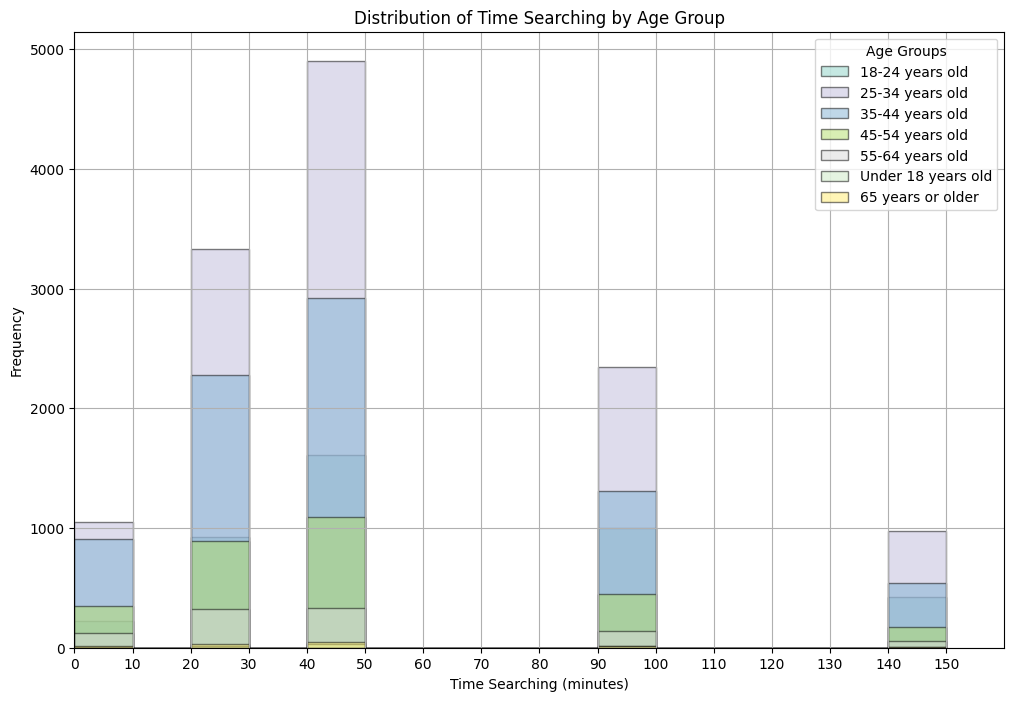

In [77]:
## Write your code here

# Load the dataset
df = pd.read_csv('survey-data.csv')

df['Age'] = df['Age'].replace('Prefer not to say', pd.NA)
df.dropna(subset=['TimeSearching', 'Age'], inplace=True)

# Map the time categories to numeric values (minutes)
time_mapping = {
    'Less than 15 minutes a day': 7.5,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150
}

# Map the Age column to age groups (midpoints of each range)
mapping_age_group = {
    "18-24 years old": (18 + 24) / 2,
    "25-34 years old": (25 + 34) / 2,
    "35-44 years old": (35 + 44) / 2,
    "45-54 years old": (45 + 54) / 2,
    "55-64 years old": (55 + 64) / 2,
    "Under 18 years old": 18,
    "65 years or older": 65
}

df['TimeSearchingMapped'] = df['TimeSearching'].map(time_mapping)
df['AgeMapped'] = df['Age'].map(mapping_age_group)

# Plot histograms for TimeSearching 
plt.figure(figsize=(12, 8))

colors = plt.cm.Set3(np.linspace(0, 1, len(mapping_age_group)))

for age_group, color in zip(mapping_age_group.keys(), colors):
    age_group_data = df[df['Age'] == age_group]
    plt.hist(age_group_data['TimeSearchingMapped'], bins=range(0, 160, 10), 
             alpha=0.5, label=age_group, color=color, edgecolor='black')

plt.title('Distribution of Time Searching by Age Group')
plt.xlabel('Time Searching (minutes)')
plt.ylabel('Frequency')
plt.legend(title="Age Groups", loc='upper right')
plt.grid(True)

plt.xticks(range(0, 160, 10))
plt.xlim(0, 160)

plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


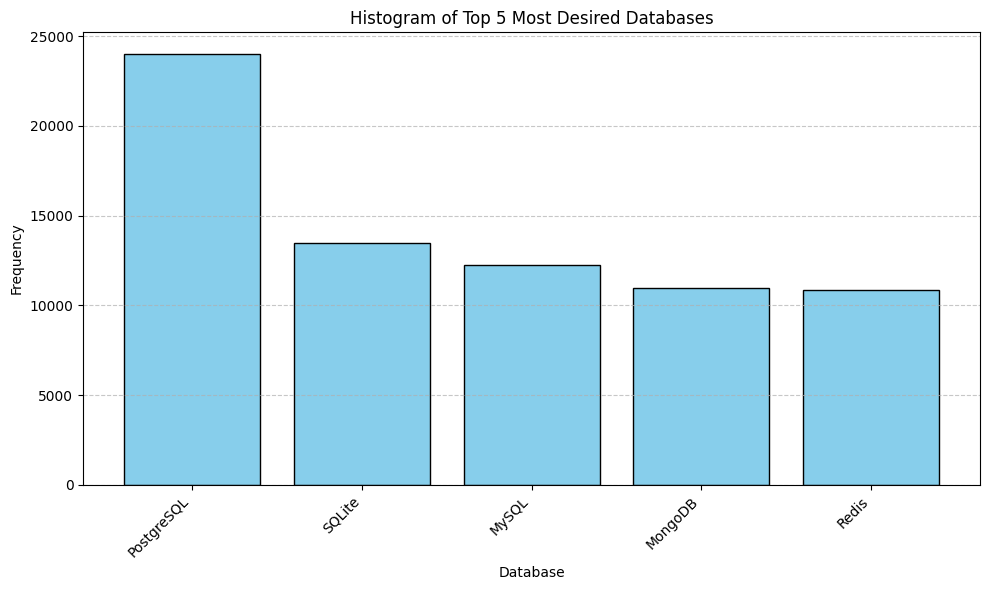

In [78]:
## Write your code here

# Load data
df = pd.read_csv('survey-data.csv')

# Drop missing values
df = df.dropna(subset=['DatabaseWantToWorkWith'])

# Split comma-separated databases into a flat list
all_dbs = df['DatabaseWantToWorkWith'].str.split(';').explode().str.strip()

# Count frequency of each
db_counts = all_dbs.value_counts()

# Get the top 5
top_5 = db_counts.head(5)

# Create a list of values matching the count, so we can use plt.hist
hist_data = []
for db, count in top_5.items():
    hist_data.extend([db] * count)

# Plot using plt.hist
plt.figure(figsize=(10, 6))
plt.hist(hist_data, bins=np.arange(len(top_5)+1)-0.5, rwidth=0.8, edgecolor='black', color='skyblue')
plt.xticks(range(len(top_5)), top_5.index, rotation=45, ha='right')
plt.xlabel('Database')
plt.ylabel('Frequency')
plt.title('Histogram of Top 5 Most Desired Databases')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


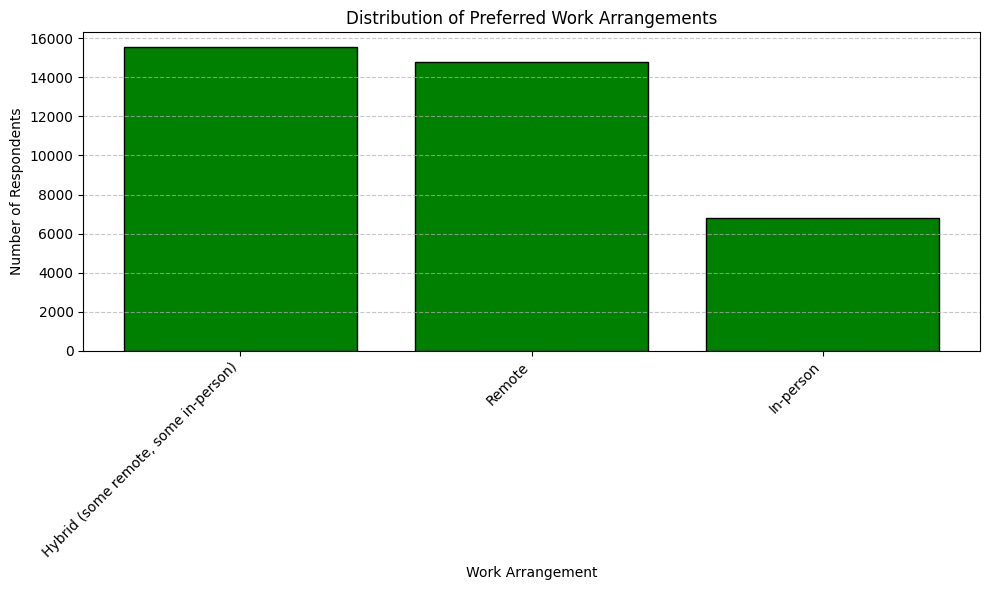

In [79]:
## Write your code here

# Ensure that the column representing work arrangements is a categorical type
df['RemoteWork'] = df['RemoteWork'].astype('category')

# Count the frequency of each preferred work arrangement
work_arrangements = df['RemoteWork'].value_counts()

# Plot as a histogram-style bar chart
plt.figure(figsize=(10, 6))
plt.bar(work_arrangements.index, work_arrangements, color='Green', edgecolor='black')

plt.title('Distribution of Preferred Work Arrangements')
plt.xlabel('Work Arrangement')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


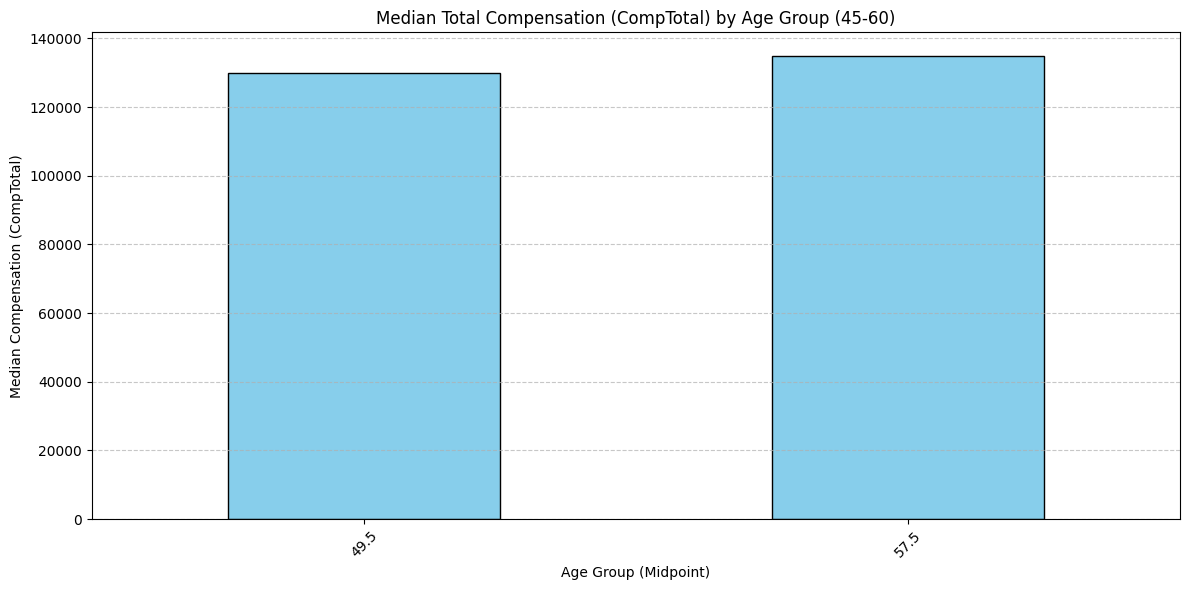

In [80]:
## Write your code here
# Load CSV into pandas
df = pd.read_csv('survey-data.csv')

# Correct SQL query with FROM clause
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IN ('45-54 years old', '55-64 years old') AND CompTotal IS NOT NULL
"""

# Fetch data
df_age_comp = pd.read_sql_query(QUERY, conn)

# Ensure numeric
df_age_comp['CompTotal'] = pd.to_numeric(df_age_comp['CompTotal'], errors='coerce')

# Mapping for Age groups
mapping_age_group = {
    "45-54 years old": (45 + 54) / 2,
    "55-64 years old": (55 + 60) / 2,
}

# Map and drop NaNs
df_age_comp['AgeMapped'] = df_age_comp['Age'].map(mapping_age_group)
df_age_comp.dropna(subset=['AgeMapped', 'CompTotal'], inplace=True)

# Median compensation by age group
median_comp_by_age_group = df_age_comp.groupby('AgeMapped')['CompTotal'].median()

# Plot
# Step 3: Plot a bar plot of the median CompTotal for each age group
plt.figure(figsize=(12, 6))
median_comp_by_age_group.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Median Total Compensation (CompTotal) by Age Group (45-60)')
plt.xlabel('Age Group (Midpoint)')
plt.ylabel('Median Compensation (CompTotal)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


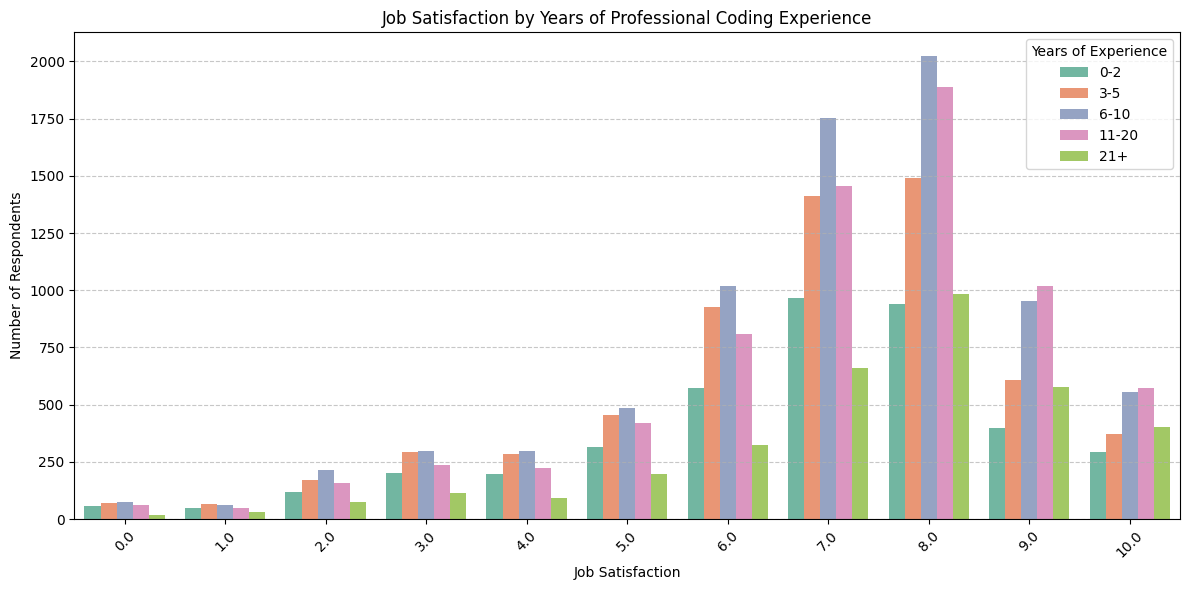

In [83]:
## Write your code here

!pip install seaborn


import seaborn as sns


# Load dataset
df = pd.read_csv('survey-data.csv')

# Convert YearsCodePro to numeric
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows with missing JobSat or YearsCodePro
df.dropna(subset=['JobSat', 'YearsCodePro'], inplace=True)

# Create bins for coding experience
bins = [0, 2, 5, 10, 20, 51]
labels = ['0-2', '3-5', '6-10', '11-20', '21+']
df['ExperienceGroup'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, include_lowest=True)

# Plot histogram-style countplot using seaborn
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='JobSat', hue='ExperienceGroup', palette='Set2')

plt.title('Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Years of Experience')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [84]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
